# Regresja Logistyczna

Zadanie regresji logistycznej polega na przewidywaniu **prawdopodobieństwa że dana próbka należy do danej klasy**. Czyli wynikiem działania takiego modelu jest liczba z przedziału $[0,1]$.

Przykładowo zadanie klasyfikując czy student zda egzamin na podstawie ilości godzin spędzonych na studiowaniu

| Ilość godzin    | 0.25 | 1 | 2.4 | 2.5 | 3 | 3.2 | 4 | 4.5 | 5 |
|-----------------|------|---|-----|-----|---|-----|---|-----|---|
| Zdanie Egzaminu | 0    | 0 | 0   | 1   | 0 | 1   | 1 | 1   | 1 |

Aby zmapować przestrzeń liczb rzeczywistych na przedział $[0,1]$ używamy funkcji sigmoidalnej
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$ 
Jest to bardzo popularna funkcja która dla skaranie wysokich/niskich wartości zwraca $0$ albo $1$ ("Nasyca się") i $0.5$ dla wartości bliskich zeru.

Funkcja $e^{-x} + 1$ dąży do $1$ dla $x \to \infty$ i $e^x + 1$ dąży do $\infty$ dla $x \to -\infty$. To sprawia że odwrotność tej funkcji dąży do $1/1=1$ dla $x \to \infty$ i $1/\infty=0$ dla $x \to -\infty$.

Wartości tej funkcji można traktować jak prawdopodobieństwa przynależenia danej próbki do klasy. W przypadku wielu klas należy wytrenować kilka klasyfikatorów rozpoznająchc prawdopodobieństwo przynależenia do danej klasy i wybrać tę klasę która ma największe prawdopodobieństwo.

Jest ona przedstawiona na poniższym wykresie

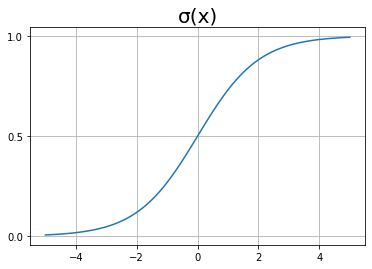

In [98]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
sig = lambda x: 1 / (1 + np.exp(-x))
plt.grid()
plt.yticks(np.arange(0, 1.5, 0.5))
plt.title("σ(x)", fontsize=20)
plt.plot(x, sig(x))

Do obliczenia gradientów potrzebna jest pochodna funkcji $\sigma(x)$ którą można łatwo obliczyć korzystając między innymi z tych dwóch twierdzeń:
* $[\frac{1}{u(x)}]' = -u(x)^{-2}u'(x)$
* $e^{u(x)} = u'(x)*e^{u(x)}$

$$
\begin{align*} 
\sigma'(x) & = \frac{\partial }{\partial x}\sigma (x) = \frac{\partial}{\partial x} (1+e^{-x})^{-1} \\
\sigma'(x) & = -(1+e^{-x})^{-2} \cdot \frac{\partial}{\partial x} (1+e^{-x}) \\
\sigma'(x) & = -(1+e^{-x})^{-2} \cdot (-e^{-x}) \\
\sigma'(x) & = \frac{e^{-x}}{(1+e^{-x})^2} \\
\sigma'(x) & = \frac{1}{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}} \\
\sigma'(x) & = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} \\
\sigma'(x) & = \frac{1}{1+e^{-x}} \cdot (\frac{1+e^{-x}}{1+e^{-x}} + \frac{1}{1+e^{-x}}) \\
\sigma'(x) & = \frac{1}{1+e^{-x}} \cdot (1 + \frac{1}{1+e^{-x}}) \\
\sigma'(x) & = \sigma(x) \cdot (1-\sigma(x))
\end{align*} 
$$

Pochodna tej funkcji jest bardzo prosta i do jej obliczenia potrzebna jest wartość samej funkcji i to w jedym punkcie, więc obliczenie pochodnej wymaga jedynie jednego wywołania funkcji sigmoidalnej.

Niżej przedstawiono wykres pochodnej funkcji sigmoidalnej.

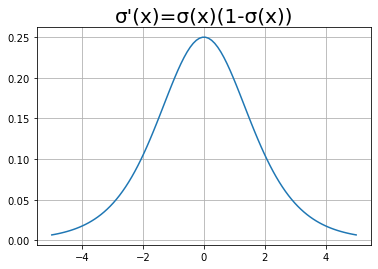

In [99]:
plt.grid()
plt.title("σ'(x)=σ(x)(1-σ(x))", fontsize=20)
plt.plot(x, sig(x)*(1-sig(x)))

## Obliczanie gradientów
Teraz mając pochodną funkcji sigmoidalnej i wiedząc jak działa regresja liniowa możemy zdefiniować regresję logistyczną i trenować podobnie jak w przypadku regresji liniowej! 

$$
\begin{align*}
\hat{y} & = \sigma(w^Tx) \\
\hat{y} & = \sigma(w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n) \\
\hat{y} & = \sigma(w_0 + \sum_{i=1}^n w_ix_i) \\
\end{align*}
$$

Aby wytrenować model należy na nowo policzyć gradienty z uzwględnieniem nowej funkcji kosztu i funkcji aktywacji (sigmoidalnej).

## Funkcja kosztu

$$
\begin{align*}
x^i &= \Reals^n \\
h_\theta(x) &= \sigma(\theta^Tx) \\
\end{align*}
$$

Funkcja kosztu musi być różniczkowalna i maksymalizować prawdopodobieństwo przynależności do danej klasy. W przypadku regresji logistycznej jest to funkcja logarytmu prawdopodobieństwa.

Ze względu na binarność wejścia jest ona zdefiniowana w postaci warunku.
$$
J_\theta(x, y) = 
\begin{cases}
-log(h_\theta(x)) & \text{if } y = 1 \\
-log(1-h_\theta(x)) & \text{if } y = 0
\end{cases}
$$

Aby zapisać ją w postaci bardziej wektoryzowalnej można warunek zamienić na mnożenie i sumę.

$$
\begin{align*}
J_\theta(x, y) &= -\frac{1}{m} \sum_{i=1}^m 
\left[ 
    \underbrace{y^i \log(h_\theta(x^i))}
    _{\text{if } y = 1} 
    + 
    \underbrace{(1-y^i) \log(1-h_\theta(x^i))}
    _{\text{if } y = 0}
\right] \\
\end{align*}
$$

## Gradient

Dalej, należy tą funkcje zróżniczkować po $\theta$ aby uzyskać gradienty.

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} J_\theta(x, y) &= \frac{\partial}{\partial \theta_j} \left( -\frac{1}{m} \sum_{i=1}^m \left[ y^i \log(h_\theta(x^i)) + (1-y^i) \log(1-h_\theta(x^i)) \right] \right) \\
\end{align*}
$$

Pierwszym krokiem jest wyjęcie sumy poza różniczkę i rozbicie na dwie części.

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} J_\theta(x, y) &= -\frac{1}{m} \sum_{i=1}^m 
\left[\frac{\partial}{\partial \theta_j} \left( y^i \log(h_\theta(x^i)) \right) + \frac{\partial}{\partial \theta_j} \left( (1-y^i) \log(1-h_\theta(x^i)) \right) 
\right] \\
\end{align*}
$$

I do uproszczenia zapisu zapiszemy jedynie część z logarytmem.

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} & (   y^i  \log(h_  \theta(x^i))) & (1)\\
\frac{\partial}{\partial \theta_j} & ((1-y^i) \log(1-h_\theta(x^i))) & (2)\\
\end{align*}
$$

## Chain rule
Pochodną $\log(x)$ jest $\frac{1}{x}$, a **chain rule** pozwala nam składać funkcje ze sobą:

$$
\begin{align*}
\frac{\partial}{\partial x} \left( f(g(x)) \right) &= f'(g(x)) \cdot g'(x) \\
\end{align*}
$$

## Rozbicie na części

W przypadku $(1)$ mamy:

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} \left( y^i \log(h_\theta(x^i)) \right) &= y^i \cdot \frac{1}{h_\theta(x^i)} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^i) \\
\end{align*}
$$

W przypadku $(2)$ mamy:

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} \left( (1-y^i) \log(1-h_\theta(x^i)) \right) &= (1-y^i) \cdot \frac{1}{1-h_\theta(x^i)} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^i) \\
\end{align*}
$$


Pochodną $h_\theta(x)$ jest 
$
    \frac{\partial}{\partial \theta_j} h_\theta(x) = 
    \frac{\partial}{\partial \theta_j} \sigma(\theta^T x)
$ 

aby ją obliczyć trzeba użyć reguły łańcuchowej.

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} h_\theta(x) &= \frac{\partial}{\partial \theta_j} \sigma(\theta^T x) \\
&= \sigma(\theta^T x) \cdot (1 - \sigma(\theta^T x)) \cdot \frac{\partial}{\partial \theta_j} \theta^T x \\
&= h_\theta(x) \cdot (1 - h_\theta(x)) \cdot x_j \\
\end{align*}
$$

$\frac{\partial}{\partial \theta_j} \theta^T x$ wynika z faktu że można zapisać jako sumę pochodnych 
$\frac{\partial}{\partial \theta_j} \sum_{i=1}^n \theta_i x_i =
 \frac{\partial}{\partial \theta_j} \theta_1 x_1 + 
 \frac{\partial}{\partial \theta_j} \theta_2 x_2 + 
 \cdots + 
 \frac{\partial}{\partial \theta_j} \theta_n x_n = 
 \frac{\partial}{\partial \theta_j} \theta_j x_j = x_j$

prawie wszystkie pochodne upraszczają się do zera poza $j$-tą.

### Przypadek 1

Mając tą informacje można zrobić podstawienie i uzyskać w $(1)$ przypadku:
$$
\begin{align*}
\frac{\partial}{\partial \theta_j} \left( y^i \log(h_\theta(x^i)) \right) 
&= y^i \cdot \frac{1}{h_\theta(x^i)} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^i) \\
&= y^i \cdot \frac{1}{h_\theta(x^i)} \cdot h_\theta(x^i) \cdot (1 - h_\theta(x^i)) \cdot x_j^i \\
&= y^i \cdot (1 - h_\theta(x^i)) \cdot x_j^i \\
\end{align*}
$$

### Przypadek 2

W $(2)$ przypadku wynikiem jest:
$$
\begin{align*}
\frac{\partial}{\partial \theta_j} \left( (1-y^i) \log(1-h_\theta(x^i)) \right)
&= (1-y^i) \cdot \frac{1}{1-h_\theta(x^i)} \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^i) \\
&= (1-y^i) \cdot \frac{1}{1-h_\theta(x^i)} \cdot h_\theta(x^i) \cdot (1 - h_\theta(x^i)) \cdot x_j^i \\
&= (1-y^i) \cdot (-h_\theta(x^i)) \cdot x_j^i \\
\end{align*}
$$

Po złożeniu $(1)$ i $(2)$ otrzymujemy:

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} \left( y^i \log(h_\theta(x^i)) + (1-y^i) \log(1-h_\theta(x^i)) \right)
&= y^i \cdot (1 - h_\theta(x^i)) \cdot x_j^i + (1-y^i) \cdot (-h_\theta(x^i)) \cdot x_j^i \\
&= (h_\theta(x^i) - y^i) \cdot x_j^i \\
\end{align*}
$$

Zapiszmy to jeszcze raz, na środku

$$
\frac{\partial}{\partial \theta_j} J_\theta(x, y) = (h_\theta(x^i) - y^i) \cdot x_j^i
$$

**Gotowe!** teraz mając pochodną funkcji kosztu można aktualizować parametry $\theta$ tak samo jak w przypadku regresji liniowej. Pochodna ma podobną postać do tej z regresji liniowej.

## Wiele klas

Predykcja multi-klasowa wymaga wytrenowania odpowiednio większej ilości modeli (jeden dla każdej klasy) gdzie każdy model będzie przewidywał czy próbka należy do jednej klasy lub nie. Dla przykładu w klasyfikacji cyfr (0-9) będzie to 10 modeli z których jeden będzie przewidywać czy dana cyfra jest `0` czy nie, drugi czy jest `1` czy nie itd. Wybiera się klasę dla której model przewidział największą wartość prawdopodobieństwa. 

# Zadanie Labolatoryjne
Najpierw import bibliotek. Jest to ten sam kod co na poprzednich labolatoriach z różniącą się funkcją printowania.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

import sklearn as sk
import sklearn.preprocessing as skp 
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.metrics as skm
import sklearn.pipeline as skpl

# Ulepszona funkcja do formatowania outputu z cellów na podstaiwe doświadczeń z poprzednich laboratoriów
def displmd(*args, **kwargs):
    display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

## Wyczytwanie danych
Moduł `pandas` pozwala na łatwe wczytywanie danych z pliku `*.csv`. Wczytujemy dane z pliku `credit_clients.csv` i wyświetlamy pierwsze 5 wierszy aby sprawdzić czy dane zostały poprawnie wczytane. Parametr `header` określa czy pierwszy wiersz pliku zawiera nazwy kolumn.

In [101]:
data = pd.read_excel(io='credit_clients.xls', header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Teraz można rozdzielić dane na cechy i etykiety. W tym przypadku cechami są wszystkie kolumny oprócz ostatniej, a etykietami jest ostatnia kolumna o nazwie `default payment next month`. Zawiera ona jedynie wartości 0 i 1, czyli perfekcyjny przypadek dla regresji logistycznej. Notacja `(30000,)` oznacza jeden wiersz, to samo co `(30000, 1)`

In [102]:
df = data.iloc[:,:-1]
target = data["default payment next month"]

displmd(
    f"Rozmiar zbioru danych: `{df.shape}`",
    f"Rozmiar zbioru target: `{target.shape}`",
)
df.describe()

Rozmiar zbioru danych: `(30000, 24)`

Rozmiar zbioru target: `(30000,)`

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Analiza tej kolumny pokazuje bardzo ważną informacje - ponad `75%` próbek to `0`, oznacza to że model ma ułatwione zadanie.

In [103]:
displmd(target.describe().to_markdown())

|       |   default payment next month |
|:------|-----------------------------:|
| count |                 30000        |
| mean  |                     0.2212   |
| std   |                     0.415062 |
| min   |                     0        |
| 25%   |                     0        |
| 50%   |                     0        |
| 75%   |                     0        |
| max   |                     1        |

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [105]:
x = df.drop(columns=['ID'])
y = target
xy = pd.concat([x,y], axis=1)

train_x, test_x, train_y, test_y = skms.train_test_split(x, y, test_size=0.2)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) #type: ignore

(24000, 23) (6000, 23) (24000,) (6000,)


## Normalizacja, Regresja i Ocena

Poniżej wykonano normalizacje i trenowanie modelu regresji logistycznej.
Jak widać po wynikach, model osiągnął dokładność na zbiorze treningowym wynoszącą około $81.2\%$ jest to **jakaś** dokładność, patrząc na średnią wartość `default payment next month` wynoszącą $22.1\%$ to model jest raczej kiepski. Nawet zgadując losowo, można uzyskać dokładność $77.9\%$ (Odpowiadać na wszystkie wartości zerem).

In [106]:
nlr = skpl.make_pipeline(skp.StandardScaler(), sklm.LogisticRegression())

nlr.fit(train_x, train_y)

acc_score = skm.accuracy_score(test_y, nlr.predict(test_x))

displmd(
    "# Model Accuracy",
    f"Accuracy score: `{acc_score}`",
)

# Model Accuracy

Accuracy score: `0.8156666666666667`

In [107]:
model_y = nlr.predict(test_x[:10])
groud_y = test_y[:10]

displmd(
    "# Model output",
    f"`Model output: {list(model_y)}`",
    f"`Ground truth: {list(groud_y)}`",
)

# Model output

`Model output: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`

`Ground truth: [0, 1, 0, 1, 0, 1, 0, 1, 0, 0]`

Dodatkowo zamiast wartości binarnych, można sprawdzić prawdopodobieństwa przynależności do danej klasy. W tym celu należy wywołać funkcję `predict_proba` zamiast `predict`.

In [108]:
model_y = nlr.predict_proba(test_x[:10])
groud_y = test_y[:10]

displmd(
    "# Model output",
    f"`Model output: {' '.join([f'{_y[1]:0.2f}' for _y in model_y])}`",
    f"`Ground truth: {' '.join([f'{_y:0.2f}' for _y in groud_y])}`",
)

# Model output

`Model output: 0.19 0.18 0.07 0.23 0.22 0.54 0.22 0.26 0.27 0.18`

`Ground truth: 0.00 1.00 0.00 1.00 0.00 1.00 0.00 1.00 0.00 0.00`

Wartości te można policzyć ręcznie korzystając z `coef_` i `intercept_`. Należy pamiętać o normalizacji danych!

In [109]:
# calculating output manulay using _coef and _intercept
_coef = nlr.named_steps['logisticregression'].coef_
_intercept = nlr.named_steps['logisticregression'].intercept_
_x_norm = nlr.named_steps['standardscaler'].transform(test_x[:10])

model_y = sig(_coef @ _x_norm.T + _intercept)
groud_y = test_y[:10]

displmd(
    "# Model output (manual)",
    f"`Model output: {' '.join([f'{_y:0.2f}' for _y in model_y[0]])}`",
    f"`Treshold    : {' '.join(['1.00' if _y > 0.5 else '0.00' for _y in model_y[0]])}`",
    f"`Ground truth: {' '.join([f'{_y:0.2f}' for _y in groud_y])}`",
)

# Model output (manual)

`Model output: 0.19 0.18 0.07 0.23 0.22 0.54 0.22 0.26 0.27 0.18`

`Treshold    : 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00`

`Ground truth: 0.00 1.00 0.00 1.00 0.00 1.00 0.00 1.00 0.00 0.00`

Jak widać po macierzy model rzeczywiście najczęściej obstawia wartość `0` co kończy się dużą ilością pomyłek dla w przypadku gdy etykieta jest `1`. Wysoka dokładność nie oznacza że model jest dobry.

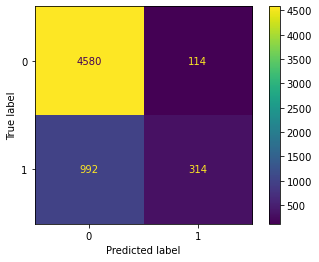

In [110]:
skm.ConfusionMatrixDisplay.from_predictions(test_y, nlr.predict(test_x))

Sprawdzanie cross walidacji nie wykazuje żadnych ciekawych zależności

In [111]:
# run cross-validation
cv = skms.cross_validate(nlr, df, target, cv=10, return_train_score=True, n_jobs=-1)

displmd(
"## Cross-validation results",
"Accuracy: {:.2f} ± {:.2f}".format(cv['test_score'].mean(), cv['test_score'].std()),
"Train accuracy: {:.2f} ± {:.2f}".format(cv['train_score'].mean(), cv['train_score'].std()),
"## All results",
pd.DataFrame(cv)[["test_score", "train_score"]].to_markdown()
)

## Cross-validation results

Accuracy: 0.81 ± 0.01

Train accuracy: 0.81 ± 0.00

## All results

|    |   test_score |   train_score |
|---:|-------------:|--------------:|
|  0 |     0.803333 |      0.811963 |
|  1 |     0.800333 |      0.812259 |
|  2 |     0.807667 |      0.811037 |
|  3 |     0.804    |      0.812    |
|  4 |     0.809333 |      0.810222 |
|  5 |     0.816667 |      0.809778 |
|  6 |     0.825    |      0.80863  |
|  7 |     0.807667 |      0.810481 |
|  8 |     0.811333 |      0.810074 |
|  9 |     0.811667 |      0.810444 |

## Regresja logistyczna bez normalizacji
Regresja logistyczna powinna działać dobrze bez normalizacji, ale proces uczenia jest trudniejszy, `sklearn` wyświatla **warning** że nie udało się osiągnąć zbieżności (zależne od run'a). Uruchomienie uczenia z większą ilością kroków usuwa definitywnie usunie warning ale nie poprawia wyniku. 

In [112]:
nlrns = skpl.make_pipeline(sklm.LogisticRegression())
nlrns.fit(train_x, train_y)
displmd(
    "## Logistic Regression without scaling",
    "Accuracy: `{:.4f}`".format(skm.accuracy_score(test_y, nlrns.predict(test_x))),
)

c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression without scaling

Accuracy: `0.7823`

In [113]:
nlrns = skpl.make_pipeline(sklm.LogisticRegression(max_iter=1000, n_jobs=-1))
nlrns.fit(train_x, train_y)
displmd(
    "## Logistic Regression without scaling **`(max_iter=1000)`**",
    "Accuracy: `{:.4f}`".format(skm.accuracy_score(test_y, nlrns.predict(test_x))),
)

## Logistic Regression without scaling **`(max_iter=1000)`**

Accuracy: `0.7823`

# Przeszukiwanie przestrzeni parametrów

`sklearn` posiada narzędzie do przeszukiwania przestrzeni parametrów, które jest bardzo przydatne przy uczeniu modeli. Można podać zakresy i parametry jakie chcemy sprawdzić a model sam sprawdzi wszystkie kombinacje i zapisze wyniki każdego z nich.
Jest to równoznaczne z wykonaniem pętli po wszystkich kombinacjach parametrów i zapisanie wyników `cross_validation` dla każdej z nich.

In [114]:
#! UWAGA: NIE URUCHAMIAĆ TEJ KOMÓRKI, DłUGO SIĘ LICZY !
# grid_search params
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga'],
}
# setup grid search
grid = skms.GridSearchCV(nlr, param_grid, cv=5, n_jobs=-1, return_train_score=True)

# run grid search
grid.fit(train_x, train_y)

c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             return_train_score=True)

Po fakcie można sprawdzić najlepsze parametry korzystając z `best_params_` oraz najlepszy wynik `best_score_`. W tym przypadu `LigisticRegression` radzi sobie w każdym przypadku źle i przeszukiwanie przestrzeni hiper-parametrów nie ma sensu.

In [115]:
displmd(
    "## Grid search results",
    "Best accuracy: `{:.4f}`".format(grid.best_score_),
    f"""Best params: 
```py 
{grid.best_params_}
```""")

## Grid search results

Best accuracy: `0.8082`

Best params: 
```py 
{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
```

In [116]:
cvres = grid.cv_results_
displmd(
    "## All results",
    pd.DataFrame(cvres)[["mean_test_score", "std_test_score", "params"]]
    .sort_values(by="mean_test_score", ascending=False)
    .apply(lambda x: ({"score": f"{x[0]:.5f}±{x[1]:.1e}", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore
    .to_markdown()
)

## All results

|    | score           | params                                                                                                            |
|---:|:----------------|:------------------------------------------------------------------------------------------------------------------|
| 13 | 0.80825±3.4e-03 | `{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}`        |
| 15 | 0.80825±3.4e-03 | `{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}`        |
|  6 | 0.80821±3.6e-03 | `{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}`  |
|  7 | 0.80821±3.4e-03 | `{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}`       |
| 11 | 0.80812±3.4e-03 | `{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}`         |
|  9 | 0.80808±3.4e-03 | `{'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}`         |
| 14 | 0.80800±3.3e-03 | `{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}`   |
| 10 | 0.80796±3.4e-03 | `{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}`    |
| 12 | 0.80796±3.4e-03 | `{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}`   |
|  8 | 0.80783±3.4e-03 | `{'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}`    |
|  2 | 0.80775±3.1e-03 | `{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}` |
|  4 | 0.80771±3.3e-03 | `{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}`  |
|  5 | 0.80763±3.3e-03 | `{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}`       |
|  3 | 0.80708±2.8e-03 | `{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}`      |
|  0 | 0.80554±2.4e-03 | `{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}` |
|  1 | 0.80483±2.3e-03 | `{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}`      |

# Może zbiór uczący 50/50?

Wytrenwanie modelu na pełnym zbiorze wymusi na modelu uczenie się na danych niezbalansowanych. Może lepiej będzie trenować model na zbiorze uczącym w którym jest równo próbek z każdej klasy?

Wygenerujmy dane i sprawdźmy jak model radzi sobie na takim zbiorze w porównaniu starego modelu

In [117]:
# get x values so there is 50% y equal to 1 and 50% y equal to 0   
# split data into 2 groups
x1 = x[y == 1]
x0 = x[y == 0]

ones_count = x1.shape[0]
# get ones_count random values from 0 group 
x0 = x0.sample(ones_count)

# concat groups
x_2 = pd.concat([x1, x0], axis=0)
y_2 = pd.concat([pd.Series([1] * ones_count), pd.Series([0] * ones_count)], axis=0)

# split to train and test
train_x_2, test_x_2, train_y_2, test_y_2 = skms.train_test_split(x_2, y_2, test_size=0.2)

# mean of y should be ~0.5
train_y_2.describe() #type: ignore


count    10617.000000
mean         0.496468
std          0.500011
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
dtype: float64

In [118]:
# train model & do grid search
nlr_2 = skpl.make_pipeline(skp.StandardScaler(), sklm.LogisticRegression(max_iter=100))
grid_2 = skms.GridSearchCV(nlr_2, param_grid, cv=5, n_jobs=-1, return_train_score=True)

grid_2.fit(train_x_2, train_y_2)

displmd(
    "## Grid search results",
    "Best accuracy: `{:.4f}`".format(grid_2.best_score_),
    f"""Best params:
```py
{grid_2.best_params_}
```""",
)

## Grid search results

Best accuracy: `0.6869`

Best params:
```py
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
```

## Accuracy comparison

|                     |      All |   Balanced |
|:--------------------|---------:|-----------:|
| Trained on all      | 0.815667 |   0.590207 |
| Trained on balanced | 0.724833 |   0.672316 |

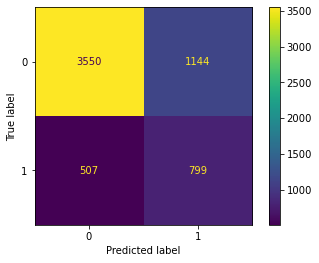

In [119]:
mat = pd.DataFrame(columns=["All", "Balanced"], index=["Trained on all", "Trained on balanced"])

mat.loc["Trained on all", "All"] = skm.accuracy_score(test_y, grid.predict(test_x))
mat.loc["Trained on all", "Balanced"] = skm.accuracy_score(test_y_2, grid.predict(test_x_2))
mat.loc["Trained on balanced", "All"] = skm.accuracy_score(test_y, grid_2.predict(test_x))
mat.loc["Trained on balanced", "Balanced"] = skm.accuracy_score(test_y_2, grid_2.predict(test_x_2))

displmd(
    "## Accuracy comparison",
    mat.to_markdown(),
)
skm.ConfusionMatrixDisplay.from_predictions(test_y, grid_2.predict(test_x))

Jak widać oba modele radzą sobie źle na zbalansowanych danych, ale model na nich trenowany znacznie lepiej. Model trenowany na zbiorze niezbalansowanym ma również gorszy wynik na całym zbiorze ale wynika to z tego że nie jest **zbiasowany** przez przewagę próbek z klasy `0`. 

Po `confusion_matrix` można zauważyć że model trenowany na zbalansowanym zbiorze ma dużo mniej pewności do której klasy należy próbka, w porównaniu ze starym modelem który mógł z góry założyć że próbka prawdobodobnie należy do klasy `0`.

Dodatkowo wyniki drugiego modelu są bardziej stabline - wydajność oscyluje w okolicy `70%` a nie jak w przypadku pierwszego modelu gdzie wynik osiąga `80%` dla całego zbioru ale `60%` dla zbalansowanego.

# Wnioski
* Regresja logistyczna jest bardzo podobna do regresji liniowej, różni się jedynie funkcją aktywacji i koncepcją regresji wieloklasowej.
* Regresja liniowa nie nadaje się do tego problemu (za mała dokładność)
* Wyprowadzanie funkcji sigmoidalnej z użyciem `latex'u` to zły pomysł
* Ostrożnie dobierać parametry do przeszukiwania bo czasami może to być bardzo długo trwający proces
* Trenowanie na danych znormalizowanych jest szybsze (otpymalizator lepiej sobie radzi)
* Modele są czułe na balans danych